# Progetto MOBD

In [2]:
from sklearn import svm
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
testset = pd.read_csv('training_set.csv')
testset

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F12,F13,F14,F15,F16,F17,F18,F19,F20,CLASS
0,-0.555694,-0.848258,0.132180,-4.061760,1.661394,2.219988,0.360537,2.537116,-0.613588,2.078144,...,-2.492234,0.808907,-1.078887,3.438161,2.372122,1.899934,2.372122,2.219416,0.132180,2
1,0.293193,-2.628978,-1.154407,0.538828,-0.169857,3.487574,0.443397,-0.006410,-0.125778,1.223669,...,-1.723842,1.772836,0.467387,-1.501851,-3.599221,-0.968531,-3.599221,1.127776,-1.154407,0
2,-2.078656,-0.834492,1.241461,1.010122,-1.638526,0.247378,-1.887390,-1.331368,-2.159086,0.002788,...,-1.686278,-1.047410,-1.133299,-1.953928,-1.149684,1.111692,-1.149684,0.134184,1.241461,1
3,-1.294256,-2.804065,-1.335397,-1.351379,-0.327137,1.199219,0.262458,0.825120,-0.638883,1.660732,...,4.437570,-0.093413,2.637345,-2.415704,-4.679002,0.511314,-4.679002,0.805571,-1.335397,0
4,-0.525611,0.024948,1.609361,-0.248425,1.533188,0.580862,0.049771,-0.430270,-0.714264,-0.186867,...,0.404803,-0.733368,1.288384,-1.646543,-1.020989,0.658584,-1.020989,1.412792,1.609361,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0.405098,0.592920,2.441859,-1.134919,2.248627,2.509097,-0.227617,0.275321,-0.274926,-0.595862,...,-0.169544,-0.255823,2.695956,-2.220396,-2.432903,-0.131110,-2.432903,-0.479939,2.441859,1
7996,-0.404388,1.813804,-2.483380,2.093664,0.139423,2.617027,0.489677,1.387914,-0.363073,0.030530,...,0.124103,0.056482,-0.333988,-1.204211,-0.224673,1.521622,-0.224673,-1.096852,-2.483380,2
7997,0.233546,-1.003142,-2.121826,1.581558,1.152723,-0.987152,0.337969,-4.654229,-0.417682,-1.260857,...,2.469214,2.782867,0.888288,0.335607,-2.248307,-1.386542,-2.248307,0.934043,-2.121826,0
7998,1.120382,0.194409,-0.672968,0.005154,2.290353,4.112554,0.720367,0.563533,-1.009534,-1.551473,...,0.607569,3.102179,4.237942,-0.710731,-0.359420,-1.500903,-0.359420,-0.658633,-0.672968,1


In [4]:
print(f'Numero di righe e colonne : {testset.shape}')

Numero di righe e colonne : (8000, 21)


In [5]:
# Sommario informazioni del dataset
testset.info

<bound method DataFrame.info of             F1        F2        F3        F4        F5        F6        F7  \
0    -0.555694 -0.848258  0.132180 -4.061760  1.661394  2.219988  0.360537   
1     0.293193 -2.628978 -1.154407  0.538828 -0.169857  3.487574  0.443397   
2    -2.078656 -0.834492  1.241461  1.010122 -1.638526  0.247378 -1.887390   
3    -1.294256 -2.804065 -1.335397 -1.351379 -0.327137  1.199219  0.262458   
4    -0.525611  0.024948  1.609361 -0.248425  1.533188  0.580862  0.049771   
...        ...       ...       ...       ...       ...       ...       ...   
7995  0.405098  0.592920  2.441859 -1.134919  2.248627  2.509097 -0.227617   
7996 -0.404388  1.813804 -2.483380  2.093664  0.139423  2.617027  0.489677   
7997  0.233546 -1.003142 -2.121826  1.581558  1.152723 -0.987152  0.337969   
7998  1.120382  0.194409 -0.672968  0.005154  2.290353  4.112554  0.720367   
7999  0.994641 -1.185386 -3.610239  0.185566 -1.534623  3.021333 -0.721372   

            F8        F9       

## Pulizia Dati

In [6]:
print('Display NA values in each columns:')
testset.isna().sum(axis = 0)

Display NA values in each columns:


F1        6
F2        6
F3        1
F4        1
F5        4
F6        6
F7        4
F8        9
F9        6
F10       6
F11       5
F12       6
F13       3
F14      10
F15       2
F16       6
F17       4
F18       7
F19       5
F20       3
CLASS     0
dtype: int64

In [7]:
 print('Display NULL values in each columns:')
testset.isnull().sum()

Display NULL values in each columns:


F1        6
F2        6
F3        1
F4        1
F5        4
F6        6
F7        4
F8        9
F9        6
F10       6
F11       5
F12       6
F13       3
F14      10
F15       2
F16       6
F17       4
F18       7
F19       5
F20       3
CLASS     0
dtype: int64

In [8]:
# Elimina i valori mancanti
testset.dropna()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F12,F13,F14,F15,F16,F17,F18,F19,F20,CLASS
0,-0.555694,-0.848258,0.132180,-4.061760,1.661394,2.219988,0.360537,2.537116,-0.613588,2.078144,...,-2.492234,0.808907,-1.078887,3.438161,2.372122,1.899934,2.372122,2.219416,0.132180,2
1,0.293193,-2.628978,-1.154407,0.538828,-0.169857,3.487574,0.443397,-0.006410,-0.125778,1.223669,...,-1.723842,1.772836,0.467387,-1.501851,-3.599221,-0.968531,-3.599221,1.127776,-1.154407,0
2,-2.078656,-0.834492,1.241461,1.010122,-1.638526,0.247378,-1.887390,-1.331368,-2.159086,0.002788,...,-1.686278,-1.047410,-1.133299,-1.953928,-1.149684,1.111692,-1.149684,0.134184,1.241461,1
3,-1.294256,-2.804065,-1.335397,-1.351379,-0.327137,1.199219,0.262458,0.825120,-0.638883,1.660732,...,4.437570,-0.093413,2.637345,-2.415704,-4.679002,0.511314,-4.679002,0.805571,-1.335397,0
4,-0.525611,0.024948,1.609361,-0.248425,1.533188,0.580862,0.049771,-0.430270,-0.714264,-0.186867,...,0.404803,-0.733368,1.288384,-1.646543,-1.020989,0.658584,-1.020989,1.412792,1.609361,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0.405098,0.592920,2.441859,-1.134919,2.248627,2.509097,-0.227617,0.275321,-0.274926,-0.595862,...,-0.169544,-0.255823,2.695956,-2.220396,-2.432903,-0.131110,-2.432903,-0.479939,2.441859,1
7996,-0.404388,1.813804,-2.483380,2.093664,0.139423,2.617027,0.489677,1.387914,-0.363073,0.030530,...,0.124103,0.056482,-0.333988,-1.204211,-0.224673,1.521622,-0.224673,-1.096852,-2.483380,2
7997,0.233546,-1.003142,-2.121826,1.581558,1.152723,-0.987152,0.337969,-4.654229,-0.417682,-1.260857,...,2.469214,2.782867,0.888288,0.335607,-2.248307,-1.386542,-2.248307,0.934043,-2.121826,0
7998,1.120382,0.194409,-0.672968,0.005154,2.290353,4.112554,0.720367,0.563533,-1.009534,-1.551473,...,0.607569,3.102179,4.237942,-0.710731,-0.359420,-1.500903,-0.359420,-0.658633,-0.672968,1


In [9]:
# Mescola le righe
testset.sample(frac = 1)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F12,F13,F14,F15,F16,F17,F18,F19,F20,CLASS
4853,0.414421,-3.068726,-2.539705,-5.266627,-1.283642,2.701263,-1.703396,-0.209144,1.003671,-0.061185,...,1.725771,-0.891479,2.845905,2.056318,-1.784874,-0.109754,-1.784874,-0.317275,-2.539705,0
4438,-1.238450,1.159940,0.339491,4.969674,-2.123322,-3.424878,2.919075,0.913441,-0.412690,0.306011,...,0.025826,-0.141782,1.594487,-1.646484,1.039439,0.734777,1.039439,1.020948,0.339491,2
7175,-0.376651,0.241553,-1.389163,-0.075564,1.559426,8.890494,-3.296859,0.141437,0.585779,1.825168,...,-2.526032,-0.210838,0.491908,-2.935905,0.415877,-1.004485,0.415877,0.241698,-1.389163,3
5885,-0.618219,0.735272,-2.321907,0.129941,2.455462,6.981840,-0.315743,1.111181,1.640076,-1.106179,...,-2.909939,-1.071447,-2.008231,-1.760856,-1.712132,0.017229,-1.712132,1.529337,-2.321907,0
3101,2.403928,0.202925,-2.116239,1.505877,1.614974,4.659059,0.724839,-0.686960,1.350869,-0.074252,...,0.835651,2.247971,4.456460,-1.883726,-1.928068,-1.371253,-1.928068,0.199144,-2.116239,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2213,0.559064,0.905570,0.729288,-1.981914,-0.535529,0.230581,-0.757313,1.864885,-1.096720,0.366399,...,-1.517987,-1.750679,-2.006356,0.975089,0.174780,-0.021167,0.174780,-0.057241,0.729288,0
1155,0.364029,-2.047535,-0.548267,0.419601,-0.360888,5.212276,-2.849607,1.960478,-2.142626,0.436818,...,-1.032253,0.084876,-2.464568,-3.329968,0.840140,0.161568,0.840140,0.887727,-0.548267,3
7000,-0.457724,-2.731996,0.496058,2.319643,-1.403859,-2.802317,1.619758,1.913880,1.140207,-0.482430,...,-0.553709,0.685933,-5.729089,-1.748004,-2.573907,-0.909536,-2.573907,-0.425126,0.496058,3
6528,-0.134193,2.854440,-2.856170,3.588261,2.267742,-2.215803,1.997909,-2.821475,1.113424,0.937069,...,1.821483,-2.191103,-2.159514,0.065549,1.636811,-0.419465,1.636811,0.411959,-2.856170,0


## Dividi i dati in train/test 

In [10]:
# Dividi il test set in 60% per train e 40% per test
train_dataset , temp_test_dataset = train_test_split(testset, test_size = 0.4)

print(train_dataset.shape)
print(temp_test_dataset.shape)

(4800, 21)
(3200, 21)


In [11]:
# Dividi il test_dataset in 50% per il test 50% per validare
test_dataset , valid_dataset = train_test_split(temp_test_dataset , test_size = 0.5)

print(test_dataset.shape)
print(valid_dataset.shape)

(1600, 21)
(1600, 21)


In [12]:
print(f'Display the datatype of the test_dataset: {type(test_dataset)}')
print(f'Train dataset : {train_dataset.shape}')
print(f'Test dataset : {test_dataset.shape}')
print(f'Validation dataset : {valid_dataset.shape}')

Display the datatype of the test_dataset: <class 'pandas.core.frame.DataFrame'>
Train dataset : (4800, 21)
Test dataset : (1600, 21)
Validation dataset : (1600, 21)


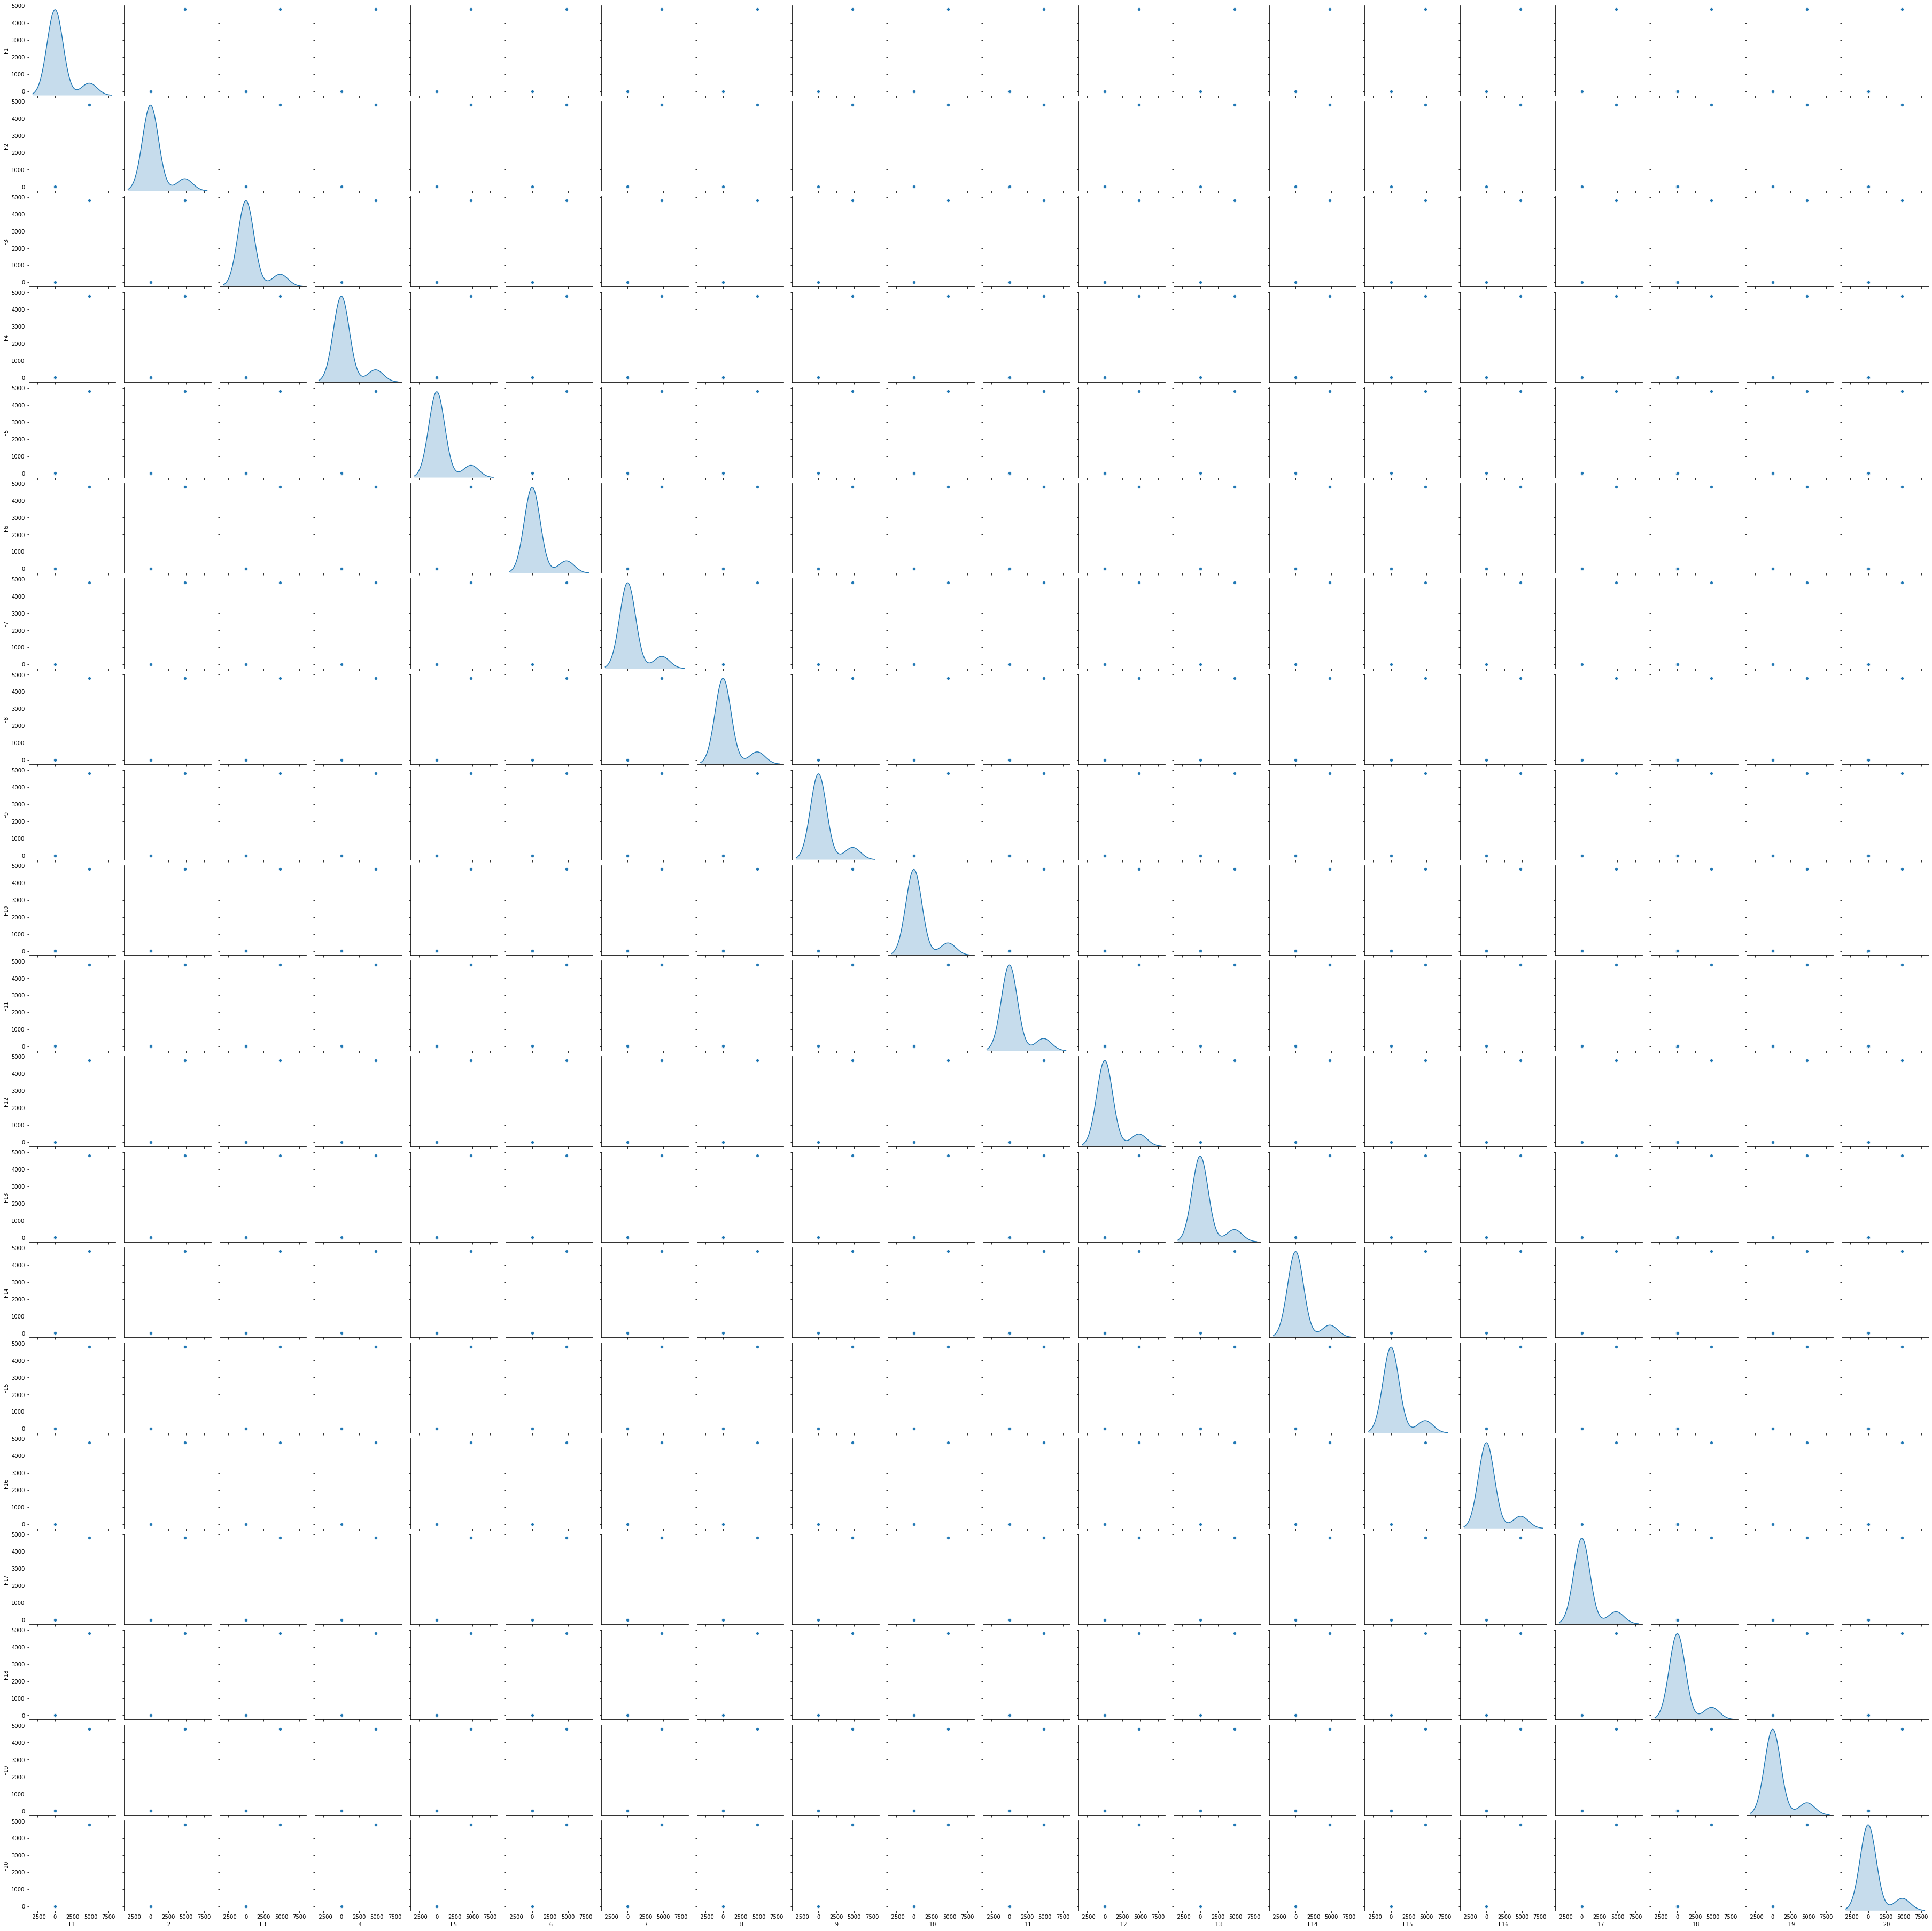

In [14]:
# Tracciare la relazione tra ciascuna due variabili per individuare eventuali errori
train_stats = train_dataset.describe()
train_stats.pop("CLASS")
sns.pairplot(train_stats[train_stats.columns],diag_kind = 'kde')

In [15]:
# Statistiche sul dataset
train_stats = train_dataset.describe()
train_stats.pop("CLASS")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
F1,4796.0,-0.013788,1.008395,-4.181155,-0.708054,-0.026755,0.674523,3.706560
F2,4798.0,-0.254705,1.859314,-6.980290,-1.472906,-0.244632,0.982510,7.090753
F3,4800.0,-0.347703,1.797706,-7.563245,-1.549789,-0.347467,0.811040,6.774458
F4,4799.0,-0.114224,3.031557,-13.133565,-1.842466,-0.049278,1.745662,10.975842
F5,4798.0,-0.497547,1.803814,-9.011808,-1.716518,-0.482579,0.677265,6.420768
F6,4796.0,0.170948,3.806757,-15.747404,-2.160658,0.081192,2.445278,17.343261
F7,4797.0,-0.150918,1.905262,-7.934826,-1.393674,-0.120364,1.126433,7.222491
F8,4799.0,0.124742,1.869645,-8.608330,-1.101649,0.127654,1.419015,6.664533
F9,4796.0,-0.017929,1.001922,-3.472781,-0.699522,-0.010779,0.650963,3.811616
F10,4797.0,0.009657,1.015232,-3.697495,-0.695925,0.007076,0.706062,3.391975


In [16]:
train_labels = train_dataset.pop('CLASS')
test_labels = test_dataset.pop('CLASS')
valid_labels = valid_dataset.pop('CLASS')

## Data Normalizatio/Scaling

Sottrai la media del data training e dividi per la deviazione standard

In [20]:
# Definiamo la funzione che normalizzerà il data set
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_valid_data = norm(valid_dataset)

In [21]:
# Stampa un esempio di dati normalizzati
normed_train_data.head(10)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20
6834,-0.152594,-0.305517,-0.039786,-0.706639,0.628200,2.194711,-2.937369,0.280968,-0.492568,-0.175859,-0.680041,0.315371,0.207888,1.012771,-1.591060,1.014159,-0.078066,1.013143,1.470422,-0.039786
5315,-0.332826,-1.051183,0.886358,-0.354030,0.101269,-0.893853,0.130855,-0.109658,0.693836,1.460061,-0.469735,1.101017,0.277412,-1.089513,-0.102359,-1.266915,0.762022,-1.266773,-0.044212,0.886358
6930,-0.346004,-0.841391,0.095972,0.882250,-0.113477,-0.743139,0.794688,-1.358516,0.249056,-0.991995,-0.503423,0.710267,1.537921,0.789179,-0.193501,-0.419418,0.516072,-0.419706,0.504265,0.095972
5773,1.141342,-0.242754,-1.103234,-0.017681,-0.484672,1.007541,-0.616123,0.043488,-0.389877,-0.533961,0.551797,-0.578283,0.611173,-0.136214,-0.401506,-1.792943,1.579252,-1.792534,0.880182,-1.103234
5898,0.219531,-1.187686,-0.088263,-1.734071,-1.526578,0.356916,-1.804296,-1.892110,1.083474,0.499019,0.906718,-0.681459,1.795198,2.397011,2.313273,-1.000568,-0.837431,-1.000561,-1.430762,-0.088263
1909,-0.429593,0.148332,-1.116362,0.282240,-1.531129,0.886450,-1.175735,0.103459,0.809225,-0.294938,0.237397,0.006400,-0.067696,0.369823,-1.100734,-1.815874,0.160580,-1.815454,0.355381,-1.116362
7717,-1.033159,1.694962,-1.008233,-0.415320,0.894320,-0.111480,0.091135,0.521277,-0.741310,1.093290,1.398869,1.918734,-2.315018,-0.950007,-0.319785,-1.027498,1.081638,-1.027477,-1.128744,-1.008233
345,0.812368,-0.342414,1.164940,0.686875,-1.240473,-1.505599,0.491463,-0.057653,0.775411,-0.222157,-1.097298,0.595986,-1.123556,-0.397226,-0.547044,0.733155,-0.026632,0.732282,-0.963178,1.164940
4480,-0.104958,0.679056,0.540609,-0.814699,-1.024225,-1.359711,-0.739048,-0.606563,0.223555,0.109754,-0.078688,1.967289,-1.705657,1.111318,1.140526,1.841564,0.381927,1.840129,0.148361,0.540609
2835,2.532210,-1.173093,-0.411250,-0.083192,0.923551,-0.138077,1.205309,-0.352693,0.980676,-0.253403,0.198992,-0.264558,0.520547,-0.268944,0.656114,0.014003,1.220996,0.013495,0.867438,-0.411250


## Modello

In [29]:
# Creo svm Clasifier

model = svm.SVC( C = 1, #reg parameter
               kernel = 'linear' #kernel{'linear','poly','rbf','sigmoid','precomputed'}, defaul = 'rbf'
               ) # Linear Kernel
# Addestriamo la SVM
model.fit(normed_train_data , train_labels)

# Predici la risposta
y_pred = model.predict(normed_test_data)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').